In [18]:
import numpy as np

# Training Data Set 준비. x_data -> 독립변수(공부시간)
x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1) # (5,-1) 앞의 행이 정해지면 열을 알아서 계산하라 (-1,5)


# t_data -> 정답데이터(시험점수)
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)


# Weight & Bias 정의
W = np.random.rand(1,1) # 1행 1열짜리(값은 1개) ndarray를 만들고 0과 1 사이의 균등분포에서 실수 난수를 추출
b = np.random.rand(1)


# predict function(예측 함수, 모델, hypothesis)
def predict(x):
    y = np.dot(x,W) + b
    return y


# loss function
def loss_func(input_data): # loss 함수는 W와 b의 함수
    
    input_W = input_data[0].reshape(1,1) # input_data -> [W b]
    input_b = input_data[1]
    
    y = np.dot(x_data, input_W) + input_b # 예측값. dot 메서드는 행렬곱연산. y = XW+b
    
    return np.mean(np.power(t_data - y, 2)) # MSE(평균제곱오차)를 구하자(v). t_data - y -> 오차. power 제곱


# 다변수 함수의 수치미분 코드. input_value = [x y] ndarray로 값이 2개 넘어온다
def numerical_derivative(f,x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # derivative_x : [0.0 0.0]. x의 shape과 같도록 ndarray 만듦

# iterator를 이용해서 입력변수 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index']) # iterator 객체를 얻어 변수 넣고 flags라는 속성으로 차원 정해주고 반복~

    while not it.finished:
        
        idx = it.multi_index
        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)

        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

        x[idx] = tmp
        it.iternext()
        
    return derivative_x


# learning rate의 값을 설정. 초기에는 1e-4 or 1e-3 정도로 설정
learning_rate = 1e-4


# 학습과정을 진행
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0) # [W b] Numpy array. 1차원을 열 방향으로 붙여라
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param) # 편미분한 값에 learning_rate를 곱함
    
    W = W - derivative_result[0].reshape(1,1) # 새로운 W'
    b = b - derivative_result[1] # 새로운 b'
    
    if step % 30000 == 0: # loss 값이 실제로 줄어드는지 10번만 출력해서 확인하자
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0) # loss 값 구하기 위해
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

W : [[0.77152861]], b:[0.04380901], loss:24.562782318726413
W : [[2.05746079]], b:[0.79254831], loss:0.007833342042532731
W : [[2.02083839]], b:[0.92476679], loss:0.0010302254779864365
W : [[2.00755713]], b:[0.97271637], loss:0.0001354931943132694
W : [[2.00274062]], b:[0.99010548], loss:1.7819793916477376e-05
W : [[2.0009939]], b:[0.99641171], loss:2.3436236545577826e-06
W : [[2.00036044]], b:[0.99869869], loss:3.082286955728608e-07
W : [[2.00013072]], b:[0.99952808], loss:4.053762155304873e-08
W : [[2.0000474]], b:[0.99982885], loss:5.331426907287534e-09
W : [[2.00001719]], b:[0.99993793], loss:7.011786032588625e-10


In [19]:
# 6시간 공부하면 몇 점일지를 예측해보자

predict_date = predict(np.array([[6]])) # 인자를 2차원으로 줘야 행렬곱연산이 일어남
print('6시간 공부했을 때 점수 : ', predict_date)

6시간 공부했을 때 점수 :  [[13.0000149]]


In [21]:
from sklearn import linear_model

x_data = np.array([1, 2, 3, 4, 5], dtype=np.float64).reshape(5,1) # Training Data Set
t_data = np.array([3, 5, 7, 9, 11], dtype=np.float64).reshape(5,1)

model = linear_model.LinearRegression() # model 생성

model.fit(x_data, t_data) # model 학습

print('W : {}, b:{}'.format(model.coef_, model.intercept_)) # W : [[2.]], b:[1.]. W, b 구해보자

print(model.predict(np.array([[6]]))) # [[13.]]. model을 이용한 예측

W : [[2.]], b:[1.]
[[13.]]


In [31]:
# Ozone량 예측하는 모델을 만들어 보자
import numpy as np
import pandas as pd

# 다변수 함수의 수치미분 코드
def numerical_derivative(f,x):

    delta_x = 1e-4
    derivative_x = np.zeros_like(x)

# iterator를 이용해서 입력변수 x에 대한 편미분을 수행
    it = np.nditer(x, flags=['multi_index'])

    while not it.finished:
        
        idx = it.multi_index
        tmp = x[idx]

        x[idx] = tmp + delta_x
        fx_plus_delta = f(x)

        x[idx] = tmp - delta_x
        fx_minus_delta = f(x)

        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)

        x[idx] = tmp
        it.iternext()
        
    return derivative_x

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')
# display(df.head())

# Ozone(오존량) : 종속변수
# Solar.R(태양광세기), Wind, Temp : 독립변수. Linear Regression으로 하나의 독립변수만 사용함
training_data = df[['Ozone', 'Temp']]
# display(training_data)
# print(training_data.shape) # (153, 2)
# training_data.info() # 결치값이 존재함. 데이터가 충분히 많다면 삭제 or 대체

training_data.dropna(how='any', inplace=True) # 결치가 존재하는 행을 삭제
# training_data.info()

x_data = training_data['Temp'].values.reshape(-1,1) # Training Data Set
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_function(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data, W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x, W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W, b, loss_func(input_param)))

W : [[0.58129687]], b:[0.59589753], loss:871.031119074389
W : [[0.71641722]], b:[-11.69753347], loss:818.0413017913634
W : [[0.85903709]], b:[-22.9667817], loss:775.6759166927828
W : [[0.98977785]], b:[-33.29739081], loss:740.0740207912045
W : [[1.10962895]], b:[-42.767542], loss:710.15584610966
W : [[1.21949739]], b:[-51.44890461], loss:685.01400594736
W : [[1.32021467]], b:[-59.40717847], loss:663.8859747932473
W : [[1.41254299]], b:[-66.70259115], loss:646.1309617326336
W : [[1.4971811]], b:[-73.39035374], loss:631.2104759342972
W : [[1.57476952]], b:[-79.52107868], loss:618.6719947910289


In [32]:
# 학습종료 후 예측
predict_data = predict(np.array([[62]]))
print('온도가 62일 때 오존량 : {}'.format(predict_data)) # [[16.90439304]]

온도가 62일 때 오존량 : [[16.90439304]]


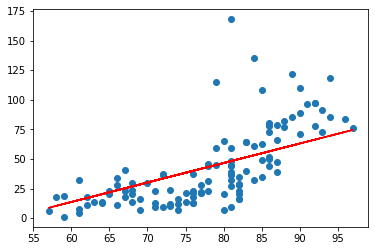

In [36]:
# 그래프로 표현해보자
import matplotlib.pyplot as plt

plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

sklearn으로 구한 온도가 62도 일 때의 오존량 : [[3.58411393]]


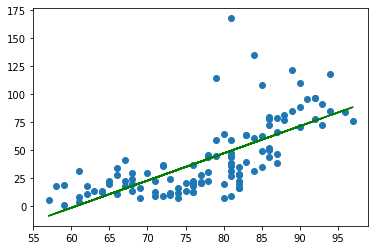

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# Raw Data Set Loading
df = pd.read_csv('./data/ozone.csv')

# Linear Regression으로 하나의 독립변수만 사용함
training_data = df[['Ozone', 'Temp']]

training_data.dropna(how='any', inplace=True) # 결치가 존재하는 행을 삭제

x_data = training_data['Temp'].values.reshape(-1,1) # Training Data Set
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일 때의 오존량 : {}'.format(result)) # [[3.58411393]]

# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()